<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Ocean_outfalls/emissarios_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats


# Statistical analysis

- Data gathering (import from github's folder) - Own file
- Rearange the data structure as needed 
  - Setting datetime index
  - Data manipulation
  - Clean data structure
    - Handling missing data
    - Handling invalid values
    - Handling duplicate data (if needed)
    - Handling text data
    - Handling outliers 
- Plot data for early visualization
  - Plot
  - Scatter
  - Boxplot
- Summary of statistics of the dataframe (.describe())
- Residual analysis (in regression)
- Statistical overview of the given data
  - Regression (linear or other method)
  - $r$-value and $r^{2}$-value

### Data Manipulation

In [2]:
header = pd.MultiIndex.from_product([['Santos', 'PG1', 'PG2', 'PG3', 'Guarujá'], # Multiindex 
                                     ['Coliformes_Totais', 'E_Coli']], 
                                    names = ['Emissários', 'Parâmetro'])

emissario_dummy = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/508926339a14af10762064ee43b71f3d9d34976c/data/resumo_emissarios_nathan.xlsx?raw=true') # dummy variable

index = []
datestring = emissario_dummy['Resumo WAQ emissários baixada santista'].astype(str)
for i in range (2,len(datestring)):
  index.append(datetime.strptime(datestring[i], "%Y-%m-%d %H:%M:%S")) # Datetime set up

# datestring
# index

ct_ecoli = pd.DataFrame(emissario_dummy.iloc[2:,1:11].values, index = index, columns= header, dtype=float) # Parameter dataframe
ct_ecoli

Emissários            Santos                           PG1              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       129970000.0  20050000.0       133480000.0  33030000.0   
2011-02-01       155310000.0  16130000.0        65034020.0  11910375.0   
2011-03-01       155310000.0  12110000.0        77710995.0  10072285.0   
2011-04-01        54750000.0   9770000.0        65110000.0   9715000.0   
2011-05-01        92080000.0  11530000.0        68495000.0  14645500.0   
...                      ...         ...               ...         ...   
2020-08-01        84757500.0  13487500.0               NaN         NaN   
2020-09-01        64005000.0  12020000.0               NaN         NaN   
2020-10-01       151627500.0  17037500.0               NaN         NaN   
2020-11-01        49550000.0   7740000.0               NaN         NaN   
2020-12-01        62580000.0  16042500.0               NaN         NaN   

Emissários               PG2                           PG3              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       111815000.0  27880000.0         1298000.0    219985.0   
2011-02-01        38827000.0   9855250.0        25713000.0   4990500.0   
2011-03-01        56856500.0   5894500.0        39875000.0   7488500.0   
2011-04-01        77010000.0  11690000.0        17999000.0   2471000.0   
2011-05-01        35585000.0   9391475.0        23333000.0   4066500.0   
...                      ...         ...               ...         ...   
2020-08-01               NaN         NaN        56155000.0   8020000.0   
2020-09-01               NaN         NaN        50437500.0   8922500.0   
2020-10-01               NaN         NaN        50055000.0   8595000.0   
2020-11-01               NaN         NaN        39132500.0   7895000.0   
2020-12-01               NaN         NaN        41907500.0  10325000.0   

Emissários           Guarujá         
Parâmetro  Coliformes_Totais E_Coli  
2011-01-01               NaN    NaN  
2011-02-01               NaN    NaN  
2011-03-01               NaN    NaN  
2011-04-01               NaN    NaN  
2011-05-01               NaN    NaN  
...                      ...    ...  
2020-08-01               NaN    NaN  
2020-09-01               NaN    NaN  
2020-10-01               NaN    NaN  
2020-11-01               NaN    NaN  
2020-12-01               NaN    NaN  

[120 rows x 10 columns]

In [3]:
# ct_ecoli.xs('Guarujá',level = 'Emissários', axis = 1).describe()
ct_ecoli.describe()

Emissários            Santos                             PG1                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.180000e+02  1.190000e+02      7.200000e+01  7.200000e+01   
mean            8.245070e+07  1.215368e+07      7.142393e+07  1.120157e+07   
std             2.623482e+07  7.610149e+06      2.643584e+07  5.578257e+06   
min             2.250500e+07  2.950000e+06      1.251000e+07  2.500000e+05   
25%             6.389062e+07  7.915000e+06      5.484125e+07  7.532500e+06   
50%             7.704500e+07  1.108500e+07      7.077625e+07  1.018000e+07   
75%             9.629375e+07  1.383250e+07      8.404861e+07  1.440575e+07   
max             1.553100e+08  7.397500e+07      1.516300e+08  3.303000e+07   

Emissários               PG2                             PG3                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           7.200000e+01  7.200000e+01      1.160000e+02  1.150000e+02   
mean            4.947129e+07  8.376930e+06      4.202664e+07  7.367796e+06   
std             2.725670e+07  4.783041e+06      2.571408e+07  5.122356e+06   
min             2.145000e+06  2.250000e+05      1.298000e+06  2.199850e+05   
25%             3.096625e+07  5.772500e+06      2.460125e+07  4.172500e+06   
50%             4.361750e+07  7.800000e+06      3.670500e+07  7.344000e+06   
75%             6.010250e+07  9.877875e+06      5.280875e+07  8.951250e+06   
max             1.516250e+08  2.788000e+07      1.477225e+08  3.591250e+07   

Emissários           Guarujá                
Parâmetro  Coliformes_Totais        E_Coli  
count           2.400000e+01  2.400000e+01  
mean            4.117542e+07  5.711042e+06  
std             1.607597e+07  4.250218e+06  
min             1.570500e+07  9.250000e+05  
25%             3.142500e+07  3.132500e+06  
50%             3.697250e+07  4.700000e+06  
75%             4.758875e+07  6.908750e+06  
max             9.234500e+07  2.202000e+07

In [20]:
# Interpolated data

ct_ecoli_interpolate = ct_ecoli.copy()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['Santos']
ct_ecoli_interpolate['Santos'] = ct_ecoli_interpolate_dummy.interpolate() 
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG1']
ct_ecoli_interpolate['PG1'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG2']
ct_ecoli_interpolate['PG2'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG3']
ct_ecoli_interpolate['PG3'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['Guarujá']
ct_ecoli_interpolate_dummy.iloc[72,0] = ct_ecoli_interpolate_dummy.iloc[80,0]
ct_ecoli_interpolate_dummy.iloc[72,1] = ct_ecoli_interpolate_dummy.iloc[80,1]
ct_ecoli_interpolate['Guarujá'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate.iloc[108:]['Guarujá'] = np.nan

ct_ecoli_interpolate

# ct_ecoli_interpolate['Guarujá'] = ct_ecoli.xs('Guarujá',level = 'Emissários', axis = 1)
# ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos']



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Emissários            Santos                           PG1              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       129970000.0  20050000.0       133480000.0  33030000.0   
2011-02-01       155310000.0  16130000.0        65034020.0  11910375.0   
2011-03-01       155310000.0  12110000.0        77710995.0  10072285.0   
2011-04-01        54750000.0   9770000.0        65110000.0   9715000.0   
2011-05-01        92080000.0  11530000.0        68495000.0  14645500.0   
...                      ...         ...               ...         ...   
2020-08-01        84757500.0  13487500.0        95060000.0  13350000.0   
2020-09-01        64005000.0  12020000.0        95060000.0  13350000.0   
2020-10-01       151627500.0  17037500.0        95060000.0  13350000.0   
2020-11-01        49550000.0   7740000.0        95060000.0  13350000.0   
2020-12-01        62580000.0  16042500.0        95060000.0  13350000.0   

Emissários               PG2                           PG3              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       111815000.0  27880000.0         1298000.0    219985.0   
2011-02-01        38827000.0   9855250.0        25713000.0   4990500.0   
2011-03-01        56856500.0   5894500.0        39875000.0   7488500.0   
2011-04-01        77010000.0  11690000.0        17999000.0   2471000.0   
2011-05-01        35585000.0   9391475.0        23333000.0   4066500.0   
...                      ...         ...               ...         ...   
2020-08-01        80747500.0  11360000.0        56155000.0   8020000.0   
2020-09-01        80747500.0  11360000.0        50437500.0   8922500.0   
2020-10-01        80747500.0  11360000.0        50055000.0   8595000.0   
2020-11-01        80747500.0  11360000.0        39132500.0   7895000.0   
2020-12-01        80747500.0  11360000.0        41907500.0  10325000.0   

Emissários           Guarujá         
Parâmetro  Coliformes_Totais E_Coli  
2011-01-01               NaN    NaN  
2011-02-01               NaN    NaN  
2011-03-01               NaN    NaN  
2011-04-01               NaN    NaN  
2011-05-01               NaN    NaN  
...                      ...    ...  
2020-08-01               NaN    NaN  
2020-09-01               NaN    NaN  
2020-10-01               NaN    NaN  
2020-11-01               NaN    NaN  
2020-12-01               NaN    NaN  

[120 rows x 10 columns]

In [21]:
ct_ecoli_interpolate.describe()

Emissários            Santos                             PG1                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.200000e+02  1.200000e+02      1.200000e+02  1.200000e+02   
mean            8.262508e+07  1.214825e+07      7.724038e+07  1.220826e+07   
std             2.633057e+07  7.578339e+06      2.677080e+07  5.006686e+06   
min             2.250500e+07  2.950000e+06      1.251000e+07  2.500000e+05   
25%             6.373062e+07  7.937500e+06      6.017125e+07  8.841250e+06   
50%             7.704500e+07  1.112750e+07      7.384750e+07  1.233108e+07   
75%             9.659000e+07  1.372125e+07      9.506000e+07  1.502625e+07   
max             1.553100e+08  7.397500e+07      1.516300e+08  3.303000e+07   

Emissários               PG2                             PG3                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.200000e+02  1.200000e+02      1.200000e+02  1.200000e+02   
mean            5.240817e+07  9.341033e+06      4.159286e+07  7.257304e+06   
std             2.410055e+07  4.075815e+06      2.542823e+07  5.056312e+06   
min             2.145000e+06  2.250000e+05      1.298000e+06  2.199850e+05   
25%             3.497250e+07  6.873750e+06      2.460125e+07  4.114125e+06   
50%             4.935958e+07  9.626000e+06      3.639375e+07  7.086250e+06   
75%             6.368125e+07  1.147875e+07      5.091438e+07  8.926875e+06   
max             1.516250e+08  2.788000e+07      1.477225e+08  3.591250e+07   

Emissários           Guarujá                
Parâmetro  Coliformes_Totais        E_Coli  
count           3.600000e+01  3.600000e+01  
mean            3.913139e+07  5.076806e+06  
std             1.335985e+07  3.758131e+06  
min             1.570500e+07  9.250000e+05  
25%             3.474500e+07  3.090000e+06  
50%             3.564000e+07  5.250000e+06  
75%             4.523000e+07  5.573750e+06  
max             9.234500e+07  2.202000e+07

### Santos 


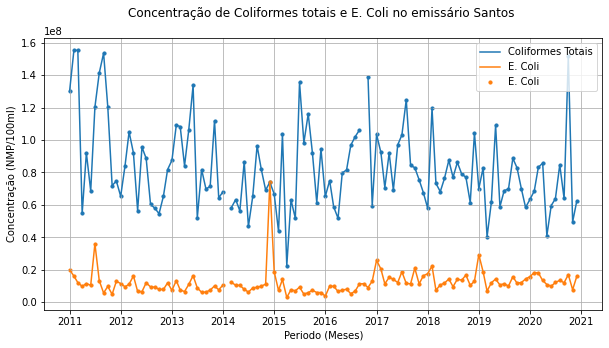

In [22]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli',s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()
 

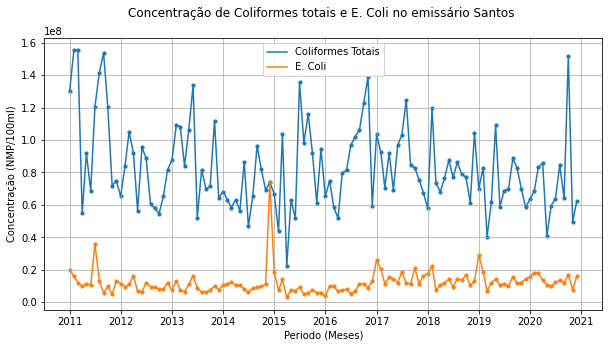

In [23]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [24]:
# Outliers detection and handling

def outlier_santos():

  Q1 = np.percentile(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=25)
  Q3 = np.percentile(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=75)
  IQ = (Q3 - Q1)
  upper_fence = Q3 + 1.5*IQ
  lower_fence = Q1 - 1.5*IQ
  
  ct_outliers = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'][(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'] <= lower_fence) | (ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'] >= upper_fence)]
  
  Q1 = np.percentile(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=25)
  Q3 = np.percentile(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=75)
  IQ = (Q3 - Q1)
  upper_fence = Q3 + 1.5*IQ
  lower_fence = Q1 - 1.5*IQ
  
  ec_outliers = ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'][(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'] <= lower_fence) | (ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'] >= upper_fence)]

  return print('Os valores a seguir são os outliers dos dados de Coliformes Totais para Santos:\n{}'.format(ct_outliers) + '\n\n' +
               'Os valores a seguir são os outliers dos dados de E. Coli para Santos: \n{}'.format(ec_outliers))

outlier_santos() 




Os valores a seguir são os outliers dos dados de Coliformes Totais para Santos:
2011-02-01    155310000.0
2011-03-01    155310000.0
2011-09-01    153570000.0
2020-10-01    151627500.0
Name: Santos, dtype: float64

Os valores a seguir são os outliers dos dados de E. Coli para Santos: 
2011-07-01    36090000.0
2014-12-01    73975000.0
2017-01-01    25855000.0
2019-01-01    29345000.0
Name: Santos, dtype: float64


Text(0.5, 1.0, 'Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')

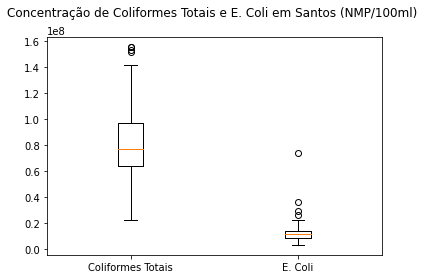

In [25]:
plt.boxplot([ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(),ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()])
plt.xticks([1, 2], ['Coliformes Totais', 'E. Coli'])
plt.title('Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')


In [10]:
# Regression analysis - Unified for all years (Coliformes Totais)

datestring2 = pd.DatetimeIndex(datestring[2:]) # Converting to DatetimeIndex to manipulate accordingly
months = datestring2.month[0:12] # Simulate one year 
year = []

for i in range (len(datestring2)):
  year.append(i) # Represent the amount of months analyzed over N years

def regressao_unif_ct():
  a = np.zeros(1)
  b = np.zeros(1)

  a, b = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 1)
  col_santos_linear_unif = np.poly1d((a,b))

  return col_santos_linear_unif

regressao_unif_ct()

poly1d([ -173670.08125564, 92958453.16804412])

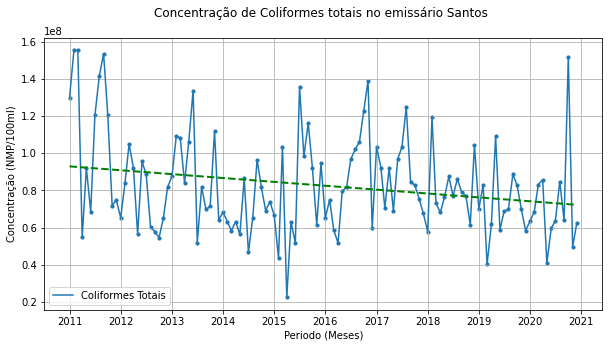

In [11]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [12]:
# Regression analysis - Separate for each year (Coliformes totais)



# type(datestring2)

# a_colsantos_2011, b_colsantos_2011 = np.polyfit(months,ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
# f_linear_a_col_santos = np.poly1d((a_colsantos_2011, b_colsantos_2011))

def regressao_frac_ct ():

    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a[0], b[0]))

    a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a[1], b[1]))

    a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a[2], b[2]))
    
    a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a[3], b[3]))

    a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a[4], b[4]))

    a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a[5], b[5]))

    a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a[6], b[6]))

    a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a[7], b[7]))

    a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a[8], b[8]))

    a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = (np.poly1d((a[9], b[9])))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_frac_ct()    

(poly1d([-3.17807692e+06,  1.32188333e+08]),
 poly1d([-1770926.57342658, 87136439.39393936]),
 poly1d([-2.49606643e+06,  1.06264848e+08]),
 poly1d([ 1522543.7062937 , 59247840.90909091]),
 poly1d([ 3644143.35664335, 55441818.18181817]),
 poly1d([ 4597325.17482517, 56644469.69696969]),
 poly1d([-1137360.13986015, 95996174.24242423]),
 poly1d([  303164.33566433, 78713181.81818178]),
 poly1d([  281984.26573426, 69981477.27272728]),
 poly1d([ 1140646.85314685, 65738295.45454544]))

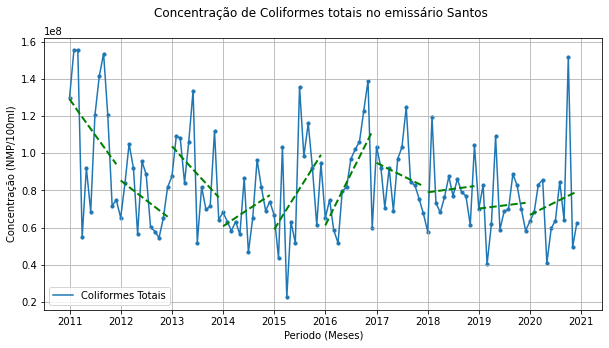

In [13]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [26]:
# Regression analysis - Unified for all years (E. coli)

datestring2 = pd.DatetimeIndex(datestring[2:]) # Converting to DatetimeIndex to manipulate accordingly
months = datestring2.month[0:12] # Simulate one year 
year = []

for i in range (len(datestring2)):
  year.append(i) # Represent the amount of months analyzed over N years

def regressao_unif_ec():
  a = np.zeros(1)
  b = np.zeros(1)

  a, b = np.polyfit(year, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], 1)
  ec_santos_linear_unif = np.poly1d((a,b))

  return ec_santos_linear_unif

regressao_unif_ec()

poly1d([   26072.67865824, 10596925.61983471])

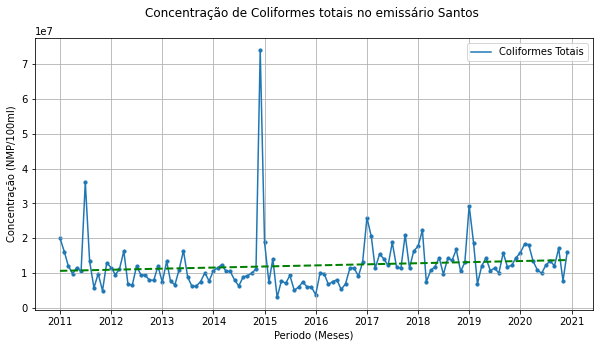

In [27]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_unif_ec()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [28]:
def regressao_frac_ec ():

    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear1 = np.poly1d((a[0], b[0]))

    a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear2 = np.poly1d((a[1], b[1]))

    a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear3 = np.poly1d((a[2], b[2]))
    
    a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear4 = np.poly1d((a[3], b[3]))

    a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear5 = np.poly1d((a[4], b[4]))

    a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear6 = np.poly1d((a[5], b[5]))

    a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear7 = np.poly1d((a[6], b[6]))

    a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear8 = np.poly1d((a[7], b[7]))

    a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear9 = np.poly1d((a[8], b[8]))

    a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear10 = (np.poly1d((a[9], b[9])))

    return ec_santos_linear1, ec_santos_linear2, ec_santos_linear3, ec_santos_linear4, ec_santos_linear5, ec_santos_linear6, ec_santos_linear7, ec_santos_linear8, ec_santos_linear9, ec_santos_linear10

regressao_frac_ec()

(poly1d([ -647412.58741259, 17772348.48484848]),
 poly1d([ -186136.36363636, 11221969.6969697 ]),
 poly1d([ -177010.48951049, 10198484.84848485]),
 poly1d([2320078.67132867,  143446.96969696]),
 poly1d([ -665559.44055944, 12441969.6969697 ]),
 poly1d([ 433828.67132867, 5729696.96969697]),
 poly1d([ -491625.87412588, 19002234.84848485]),
 poly1d([ -263776.22377622, 15192045.45454545]),
 poly1d([ -642849.65034965, 18119772.72727272]),
 poly1d([ -337403.84615385, 15936666.66666666]))

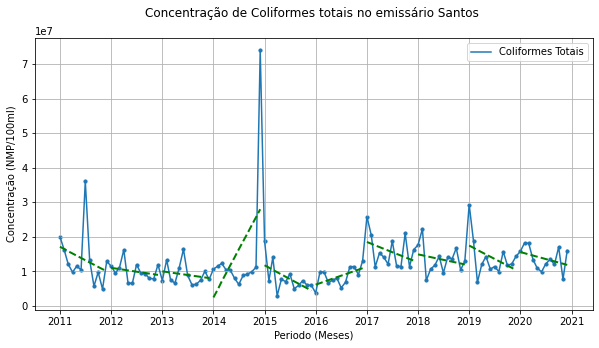

In [30]:
# Plot with linear regression for each year (E.coli)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_frac_ec()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_frac_ec()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_frac_ec()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_frac_ec()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_frac_ec()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_frac_ec()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_frac_ec()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_frac_ec()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_frac_ec()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_frac_ec()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

### PG1

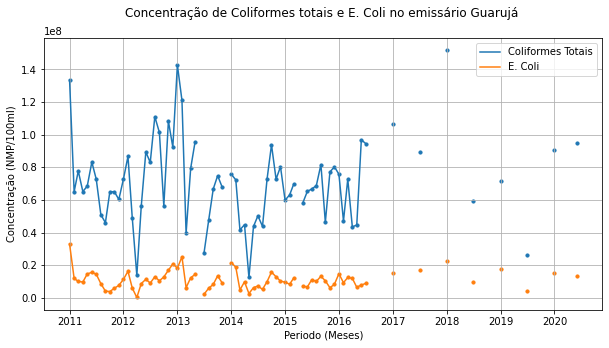

In [31]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()
 
 

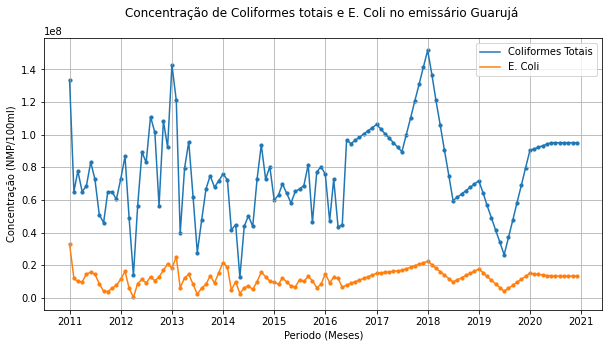

In [32]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

### PG2

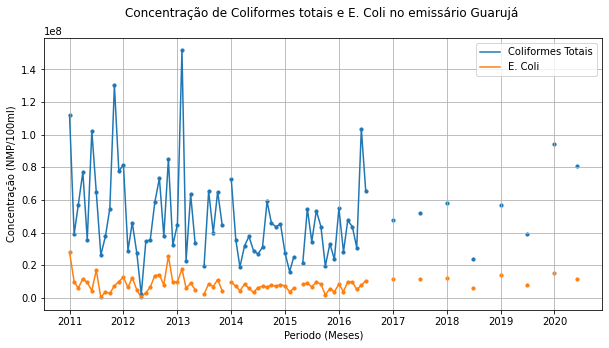

In [33]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

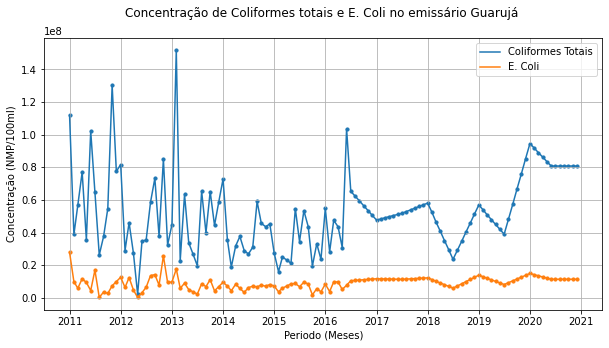

In [34]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

### PG3

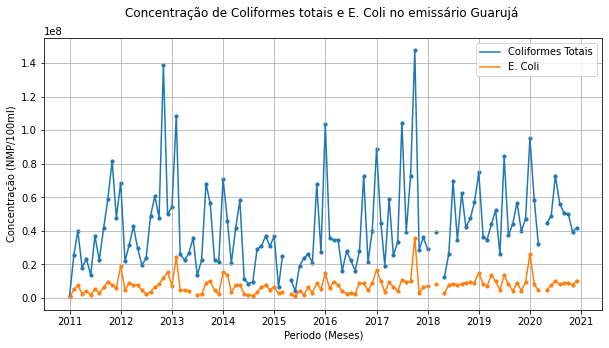

In [35]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

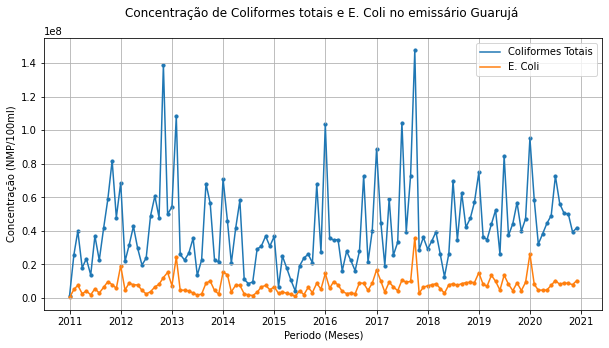

In [36]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

### Guarujá

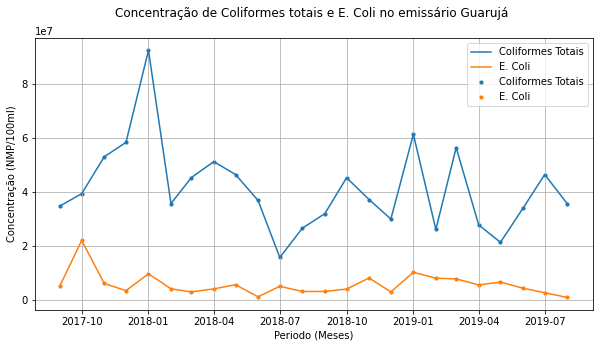

In [37]:
# Now you can use xs to slice the dateframe based on levels - df.xs('location1',level='loc',axis=1)
# pd.notnull(ct_ecoli).sum() # Check if the dataframe passed correctly

# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais',s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli',s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()
 

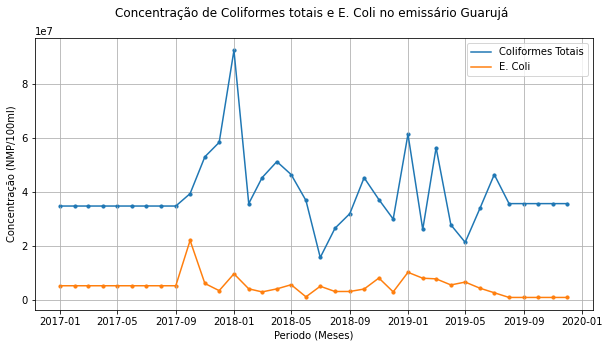

In [39]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

### All five ocean outfalls' data